# Traffic Density Vs Holidays/Observances/School Holidays
    Joseph Antony
    17th June 2023

In [1]:
import warnings
import numpy as np
from datetime import datetime

import polars as pl
pl.enable_string_cache(True)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", palette="muted", color_codes=True)

warnings.filterwarnings("ignore")

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.weight'] = 'bold'

In [2]:
%%time

select_cols = [
    'DATE_TIME', 'NUMBER_OF_VEHICLES', 'HOLIDAY_NAME', 
    'HOLIDAY_TYPE', 'SCHOOL_HOLIDAY_TYPE', 'CLUSTER', 'DISTRICT'
]

pl_df = (
    pl.scan_parquet("datasets/00_tr_df_merged/tr_ist_td_merged_full.zstd")
    .select(select_cols)

    .with_columns(pl.col('DATE_TIME').dt.date().alias('DATE'),
                  pl.col('DATE_TIME').dt.year().alias('YEAR').cast(pl.UInt16),
                  pl.col('DATE_TIME').dt.hour().alias('HOUR').cast(pl.UInt8),
                  
                  # insert National Sovereignty Holiday school holiday for 2022
                  pl.when(pl.col('DATE_TIME').dt.date().eq(datetime(2022, 4, 23)))
                  .then('National Sovereignty Holiday')

                  # insert National Sovereignty Holiday school holiday for 2022
                  .when(pl.col('DATE_TIME').dt.date().eq(datetime(2023, 4, 23)))
                  .then('National Sovereignty Holiday')

                  # insert labour day school holiday for 2022
                  .when(pl.col('DATE_TIME').dt.date().eq(datetime(2022, 5, 1)))
                  .then('Labour Day')

                  # Replacing some of school holiday names
                  .otherwise(pl.col('SCHOOL_HOLIDAY_TYPE')
                            .str.replace('^Easter holidays$|^Spring time holidays$', 'Spring holidays')
                            .str.replace('^holiday of youth$', 'Youth and Sports Day')
                            .str.replace('^National sovereignty and the child$', 'National Sovereignty Holiday')
                            .str.replace('^Eid Holiday$', 'Ramadan Holiday')
                            .str.replace(r' \(.+\) ', ' - '))
                  .cast(pl.Categorical))

    .drop('SCHOOL_HOLIDAY_TYPE')
    .rename({'literal' : 'SCHOOL_HOLIDAY_TYPE'})

).collect(streaming=True)

pl_df.head()

Wall time: 1min 1s


DATE_TIME,NUMBER_OF_VEHICLES,HOLIDAY_NAME,HOLIDAY_TYPE,CLUSTER,DISTRICT,DATE,YEAR,HOUR,SCHOOL_HOLIDAY_TYPE
datetime[ns],u16,cat,cat,u8,cat,date,u16,u8,cat
2020-01-01 00:00:00,97,"""New Year's Day…","""National holid…",13,"""Gebze""",2020-01-01,2020,0,"""Christmas holi…"
2020-01-01 01:00:00,58,"""New Year's Day…","""National holid…",13,"""Gebze""",2020-01-01,2020,1,"""Christmas holi…"
2020-01-01 02:00:00,40,"""New Year's Day…","""National holid…",13,"""Gebze""",2020-01-01,2020,2,"""Christmas holi…"
2020-01-01 03:00:00,33,"""New Year's Day…","""National holid…",13,"""Gebze""",2020-01-01,2020,3,"""Christmas holi…"
2020-01-01 04:00:00,25,"""New Year's Day…","""National holid…",13,"""Gebze""",2020-01-01,2020,4,"""Christmas holi…"


In [3]:
(
    pl_df[['HOLIDAY_NAME', 'HOLIDAY_TYPE']]
    .unique()
    .sort('HOLIDAY_TYPE', 'HOLIDAY_NAME')
    .to_pandas()
)

,HOLIDAY_NAME,HOLIDAY_TYPE
0,Non Holiday,Non Holiday
1,Ramadan Observance,Ramadan Observance
2,New Year's Day,National holiday
3,National Sovereignty and Children's Day,National holiday
4,Labor and Solidarity Day,National holiday
5,"Commemoration of Atatürk, Youth and Sports Day",National holiday
6,Ramadan Feast,National holiday
7,Ramadan Feast Holiday,National holiday
8,Democracy and National Unity Day,National holiday
9,Sacrifice Feast Eve,National holiday


In [4]:
(
    pl_df.select(['DATE', 'YEAR', 'HOLIDAY_NAME'])
    .unique()
    .groupby(['YEAR', 'HOLIDAY_NAME'], maintain_order=True)
    .agg(pl.col('DATE').n_unique())
    .pivot(index='HOLIDAY_NAME', columns='YEAR', values='DATE')
    .sort(['2020', 'HOLIDAY_NAME'])
    .to_pandas()
)

,HOLIDAY_NAME,2020,2021,2022,2023
0,Eid al Adha Public Sector Holiday,NaN,NaN,2.0,NaN
1,New Year's Day,1.0,1.0,1.0,1.0
2,March Equinox,1.0,1.0,1.0,1.0
3,National Sovereignty and Children's Day,1.0,1.0,1.0,1.0
4,Labor and Solidarity Day,1.0,1.0,1.0,NaN
5,"Commemoration of Atatürk, Youth and Sports Day",1.0,1.0,1.0,NaN
6,Ramadan Feast Eve,1.0,1.0,NaN,1.0
7,Ramadan Feast,1.0,1.0,1.0,1.0
8,June Solstice,1.0,1.0,1.0,NaN
9,Democracy and National Unity Day,1.0,1.0,1.0,NaN


    The above table shows the number of days for each of the holidays by year. In a year, Ramadan last for about 27-28 days. For 2023, data is only available until April. 

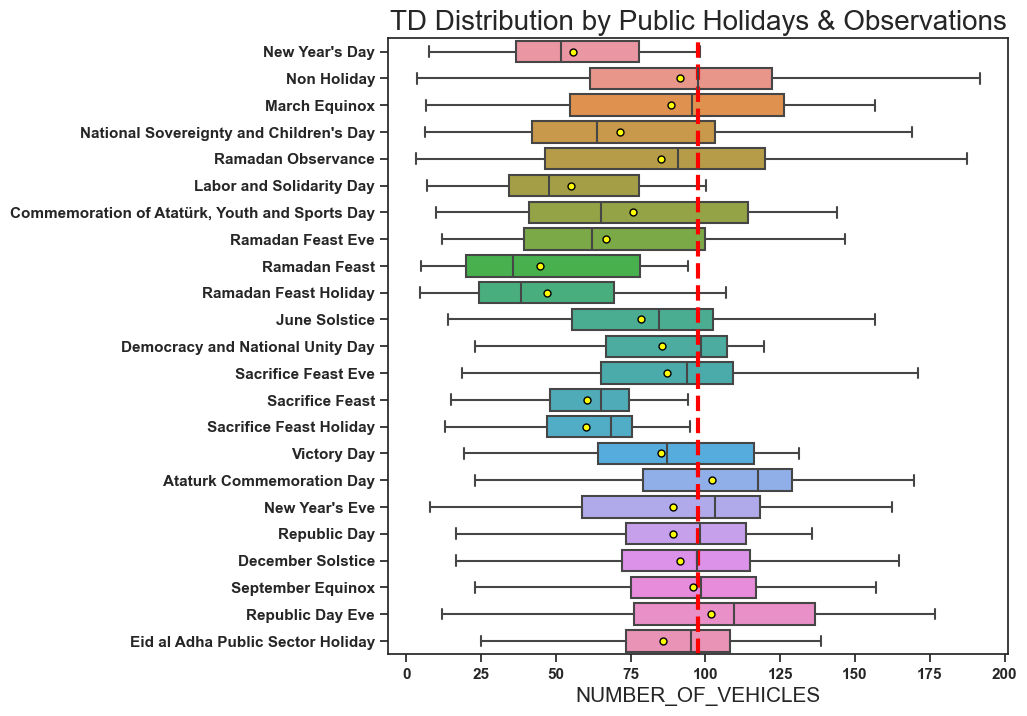

In [27]:
# Groupby DATE_TIME and take mean of traffic density
dly_mean_td_with_holiday = (
    pl_df.lazy()
    .groupby(['DATE_TIME', 'HOLIDAY_NAME'])
    .agg(pl.col('NUMBER_OF_VEHICLES').mean())
    .collect(streaming=True)
    .to_pandas()
)

plt.figure(figsize=(8, 8))

ax = sns.boxplot(
    x='NUMBER_OF_VEHICLES',
    y='HOLIDAY_NAME',
    orient='h',
    showmeans=True, #To display mean
    meanprops={
        "marker": "o",
        "markerfacecolor": "yellow",
        "markeredgecolor": "black",
        "markersize": "5"
    },
    data = dly_mean_td_with_holiday
)

ax.set_ylabel("")
ax.set_title("TD Distribution by Public Holidays & Observations")

ax.axvline(
    dly_mean_td_with_holiday.query("HOLIDAY_NAME=='Non Holiday'")['NUMBER_OF_VEHICLES'].median(), 
    c='red', 
    linestyle='--',
    lw=3
);

    The above is a boxplot that shows the distribution of mean daily number of vehicles. The vertical dashed red line is the median traffic density for non-holidays. Days such as 'Ataturk Commemoration Day', 'Republic Day Eve' and 'New Year's Eve' sees a higher median traffic density compared to normal days. The lowest median traffic density is during the Ramadan Holidays.

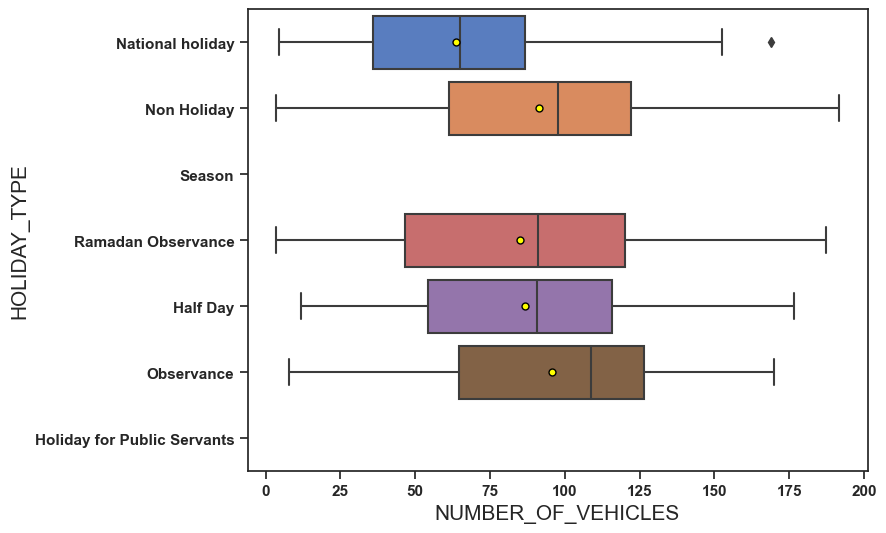

In [6]:
plt.figure(figsize=(8, 6))

ax = sns.boxplot(
    x='NUMBER_OF_VEHICLES',
    y='HOLIDAY_TYPE',
    orient='h',
    showmeans=True, #To display mean
    meanprops={
        "marker": "o",
        "markerfacecolor": "yellow",
        "markeredgecolor": "black",
        "markersize": "5"
    },
    data = (
        pl_df.lazy()
        .filter(~pl.col('HOLIDAY_TYPE').is_in(['Season', 'Holiday for Public Servants']))
        .groupby(['DATE_TIME', 'HOLIDAY_TYPE'])
        .agg(pl.col('NUMBER_OF_VEHICLES').mean())
        .collect(streaming=True)
        .to_pandas()
    )
);

    National Holiday types have a lower median traffic density compared to all other days.

### Traffic Density Hours

In [7]:
def scale_cols(x):
    return (x-x.min())/(x.max()-x.min())

In [8]:
def plot_hrly_td(hol_col_type, col):

    temp_df_1 = (
        pl_df.lazy()

        # Filter by year, non holiays and column
        .filter(pl.col(hol_col_type).is_in([col, 'Non Holiday']))

        # Groupby holiday name and hour and take traffic density mean
        .groupby([hol_col_type, 'YEAR', 'HOUR'])
        .agg(pl.col('NUMBER_OF_VEHICLES').mean())
        .collect(streaming=True)

        # pivot so that holiday names category becomes columns
        .pivot(index=['YEAR', 'HOUR'], columns=hol_col_type, values='NUMBER_OF_VEHICLES')
    )

    fig, axes = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)

    for year, ax in zip([2020, 2021, 2022, 2023], axes.flatten()):
        
        temp_df_2 = (
            temp_df_1.lazy()
            .filter(pl.col('YEAR').eq(year) & pl.col(col).is_not_null())
            .sort('HOUR')
            .drop('YEAR')

            # Scale columns usin min max scaling
            .with_columns(scale_cols(pl.col('Non Holiday')),
                            scale_cols(pl.col(col)))
            .select(['HOUR', 'Non Holiday', col])
            .collect(streaming=True)
            .to_pandas()
            .set_index('HOUR')
        )

        if len(temp_df_2)!=0:

            # plot
            temp_df_2.plot(ax=ax, lw=3, marker='o', mec='k')

            ax.set_title(year)
            ax.set_xticks(range(0, 24, 2))

        else:
            ax.set_axis_off()
    
    plt.suptitle(f'Traffic Density Hours on Non-Holidays vs {col}', fontsize=25)
    plt.show();

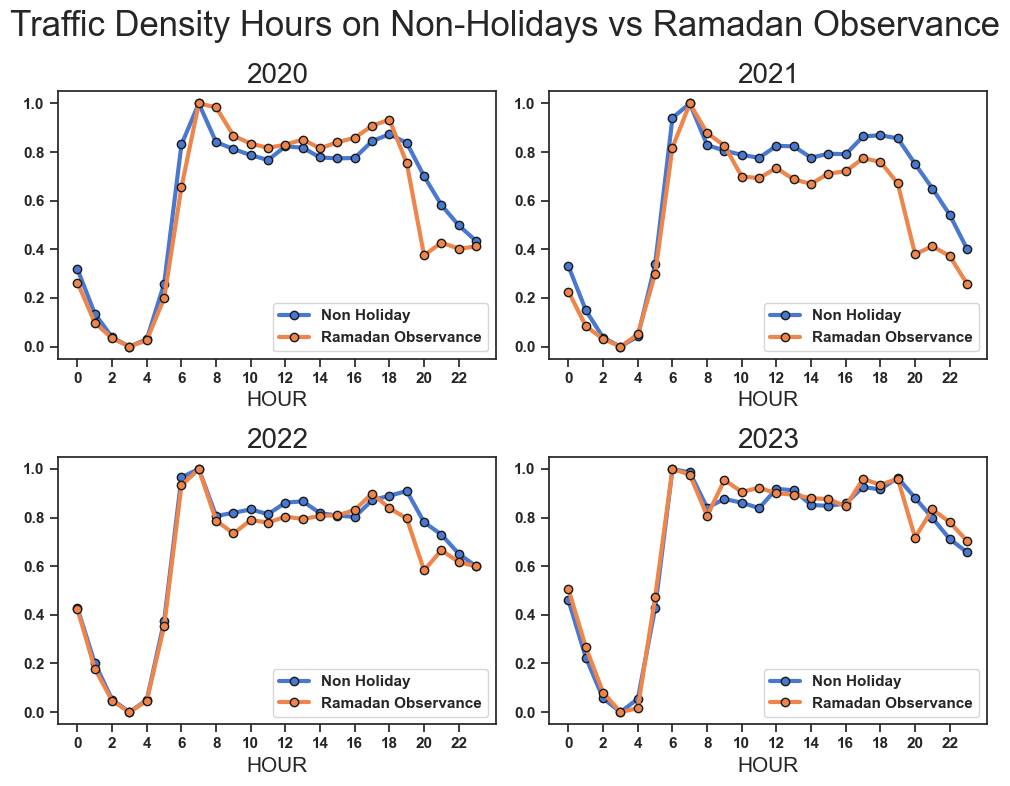

In [9]:
plot_hrly_td(hol_col_type='HOLIDAY_NAME', col='Ramadan Observance')

    The above plot compares the hourly traffic density pattern for both non holiday and Ramdan observance (days where people fast the whole day during Ramadan.) The density in the morning are same for both days. But, there is a drop in density from roughly 5pm to 8pm. This is probably because people are at home to break their fast. 

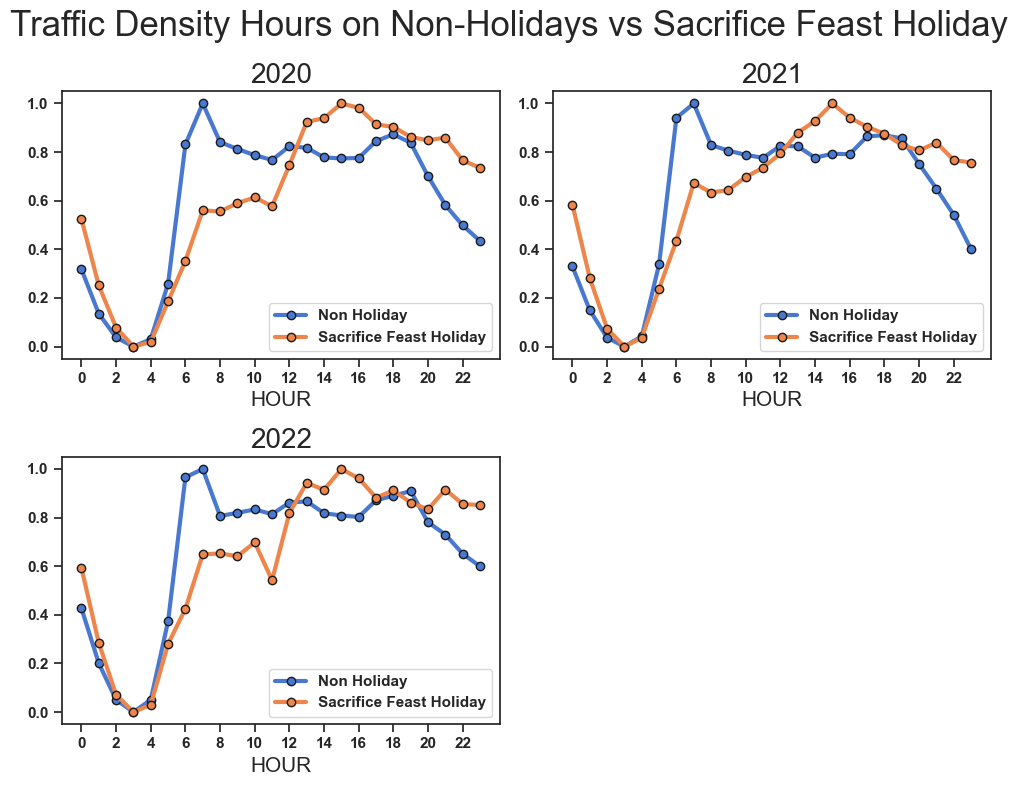

In [10]:
plot_hrly_td(hol_col_type='HOLIDAY_NAME', col='Sacrifice Feast Holiday')

    During traffic density pattern for Sacrifice Feast holiday is noticably different compared to non holidays. The highest peak in traffic occurs between 12pm to 6pm on this day. Note that there is no data for 2023 as the data is only available till April 2023.

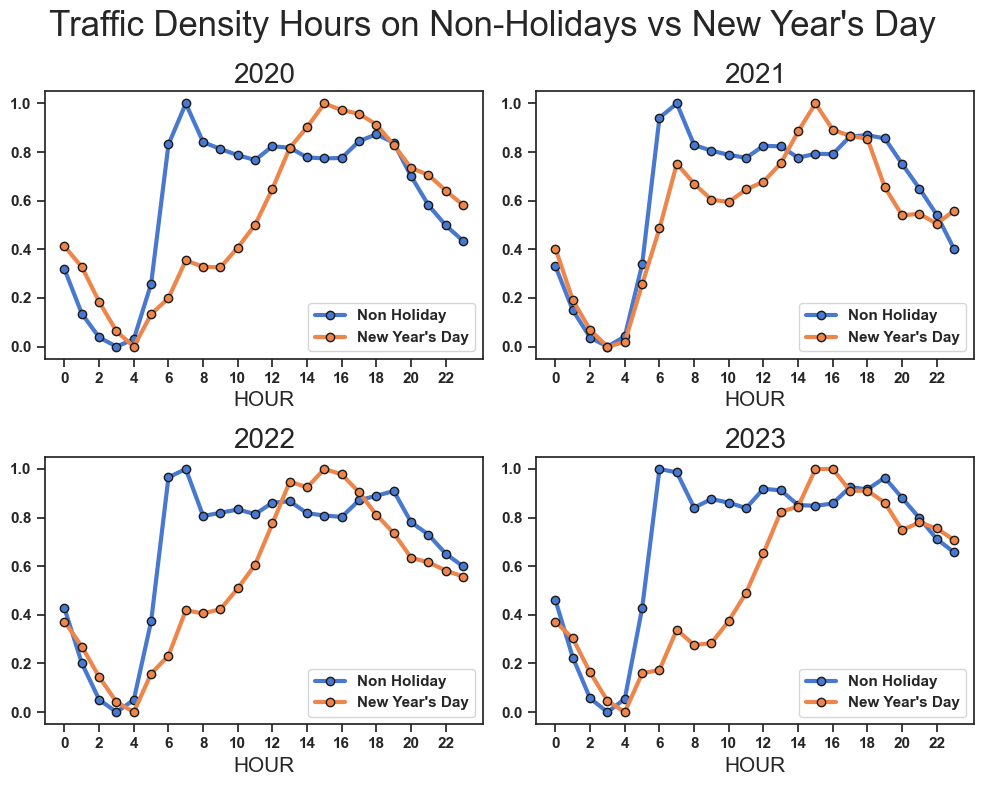

In [11]:
plot_hrly_td(hol_col_type='HOLIDAY_NAME', col="New Year's Day")

    Similar pattern is noticed during New Year's Day

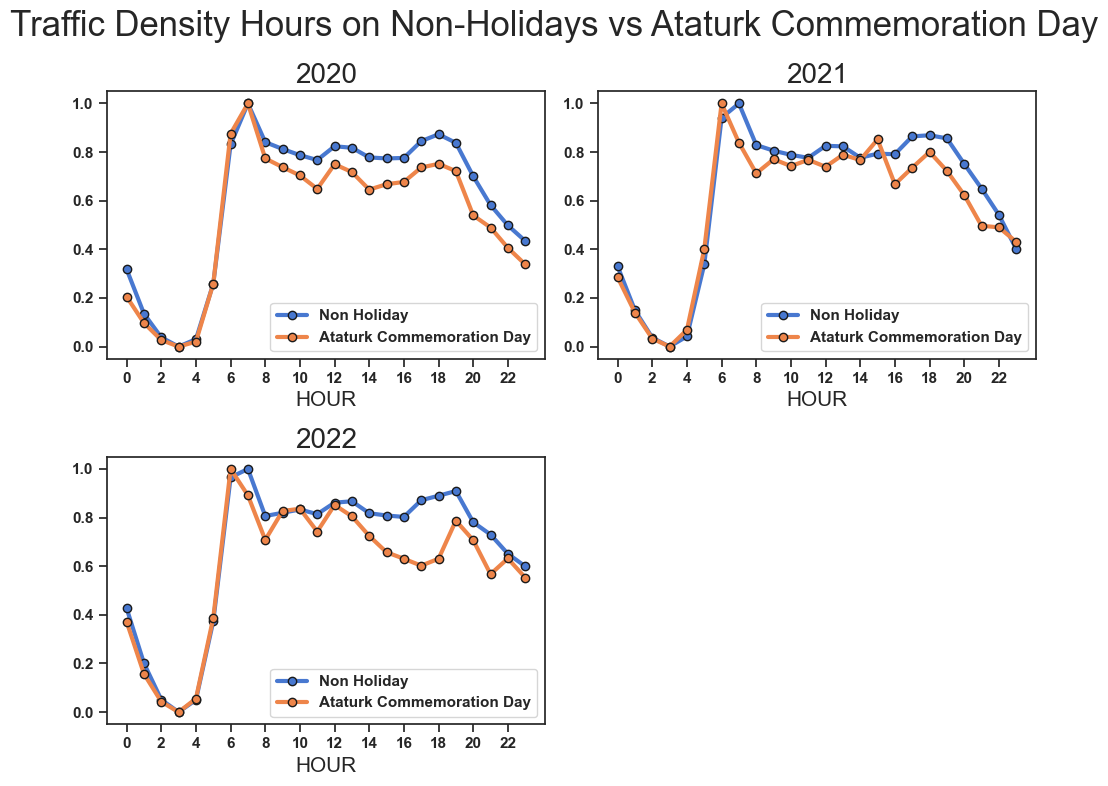

In [12]:
plot_hrly_td(hol_col_type='HOLIDAY_NAME', col="Ataturk Commemoration Day")

### Traffic Density Vs School Holidays

In [13]:
(
    pl_df.select(['DATE', 'YEAR', 'SCHOOL_HOLIDAY_TYPE'])
    .unique()
    .groupby(['YEAR', 'SCHOOL_HOLIDAY_TYPE'], maintain_order=True)
    .agg(pl.col('DATE').n_unique())
    .pivot(index='SCHOOL_HOLIDAY_TYPE', columns='YEAR', values='DATE')
    .sort(['2020', 'SCHOOL_HOLIDAY_TYPE'])
    .to_pandas()
)

,SCHOOL_HOLIDAY_TYPE,2020,2021,2022,2023
0,Christmas holidays,1,1.0,2.0,1.0
1,National Sovereignty Holiday,1,1.0,1.0,1.0
2,Labour Day,1,1.0,1.0,NaN
3,Republic of Türkiye Day,1,1.0,1.0,NaN
4,Youth and Sports Day,1,1.0,1.0,NaN
5,Ramadan Holiday,3,3.0,3.0,NaN
6,November vacation,5,5.0,9.0,NaN
7,Spring holidays,5,5.0,5.0,6.0
8,Schools closed - Covid-19,7,NaN,NaN,NaN
9,Winter holidays,12,12.0,12.0,16.0


    The above table shows the number of days for each year by school holidays type.

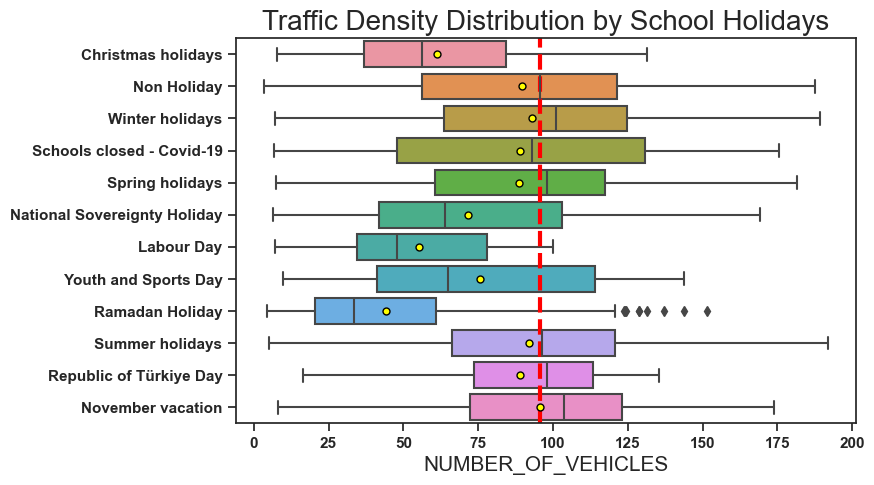

In [29]:
# Groupby DATE_TIME and take mean of traffic density
dly_mean_td_school_holiday = (
    pl_df.lazy()
    .groupby(['DATE_TIME', 'SCHOOL_HOLIDAY_TYPE'])
    .agg(pl.col('NUMBER_OF_VEHICLES').mean())
    .collect(streaming=True)
    .to_pandas()
)

plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    x='NUMBER_OF_VEHICLES',
    y='SCHOOL_HOLIDAY_TYPE',
    orient='h',
    showmeans=True, #To display mean
    meanprops={
        "marker": "o",
        "markerfacecolor": "yellow",
        "markeredgecolor": "black",
        "markersize": "5"
    },
    data = dly_mean_td_school_holiday
)

ax.set_ylabel("")
ax.set_title('Traffic Density Distribution by School Holidays')

ax.axvline(
    dly_mean_td_school_holiday.query("SCHOOL_HOLIDAY_TYPE=='Non Holiday'")['NUMBER_OF_VEHICLES'].median(), 
    c='red', 
    linestyle='--',
    lw=3
);

    The above plot is quite puzzling. It was thought that when there is a school holiday, traffic density was lower. But according to the plot here, Summer Holidays and Non holidays have the same median traffic density! Interestingly, the median traffic density for most school holidays is slightly higher than normal days.

    Even when schools were closed during COVID, the median traffic density is only slightly lower than normal days.

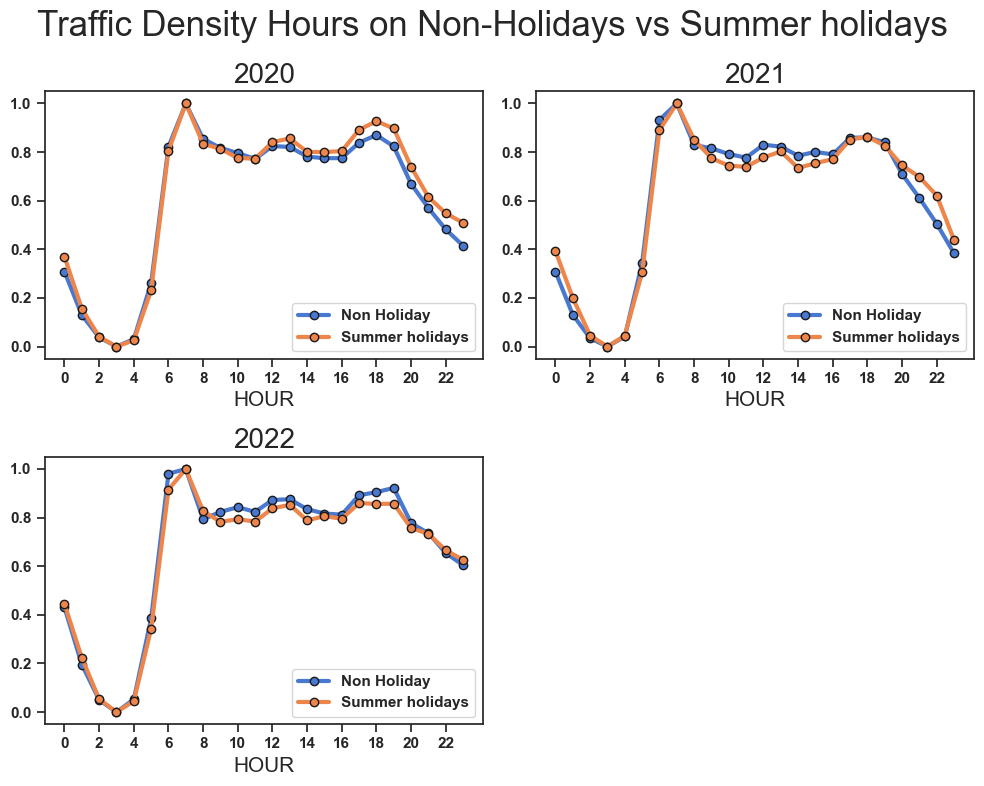

In [15]:
plot_hrly_td(hol_col_type='SCHOOL_HOLIDAY_TYPE', col='Summer holidays')

    According to the above plot, there is almost no difference in traffic density hours for normal holidays and summer holidays.

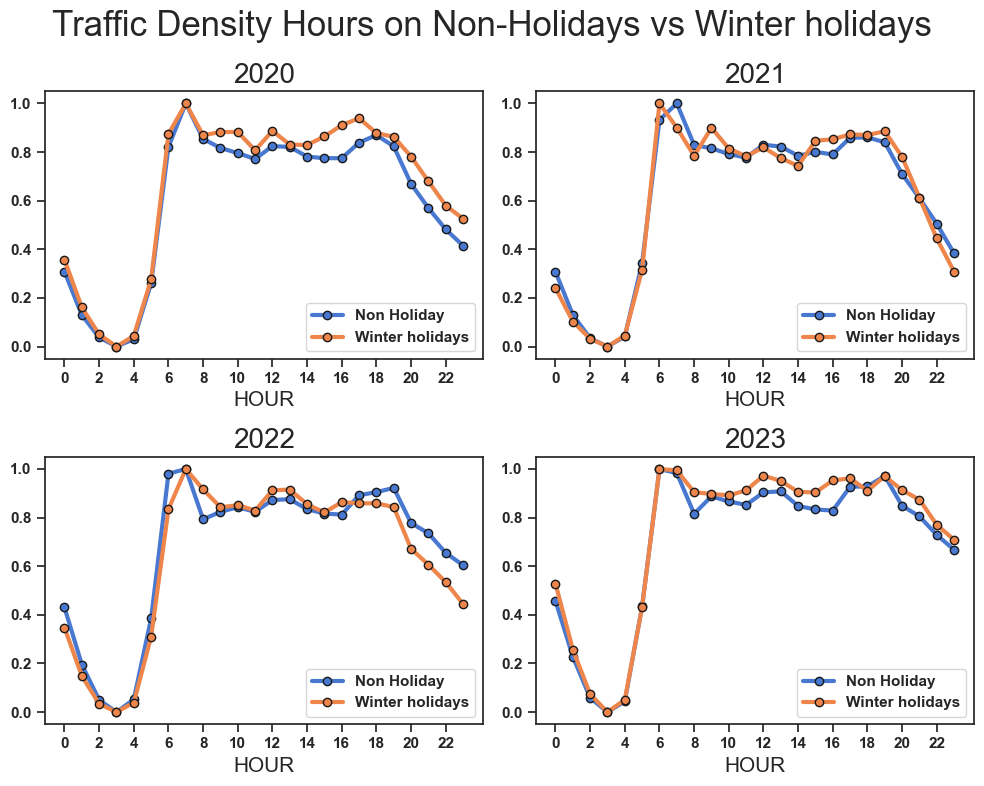

In [16]:
plot_hrly_td(hol_col_type='SCHOOL_HOLIDAY_TYPE', col='Winter holidays')

    The same is the case for winter holidays.

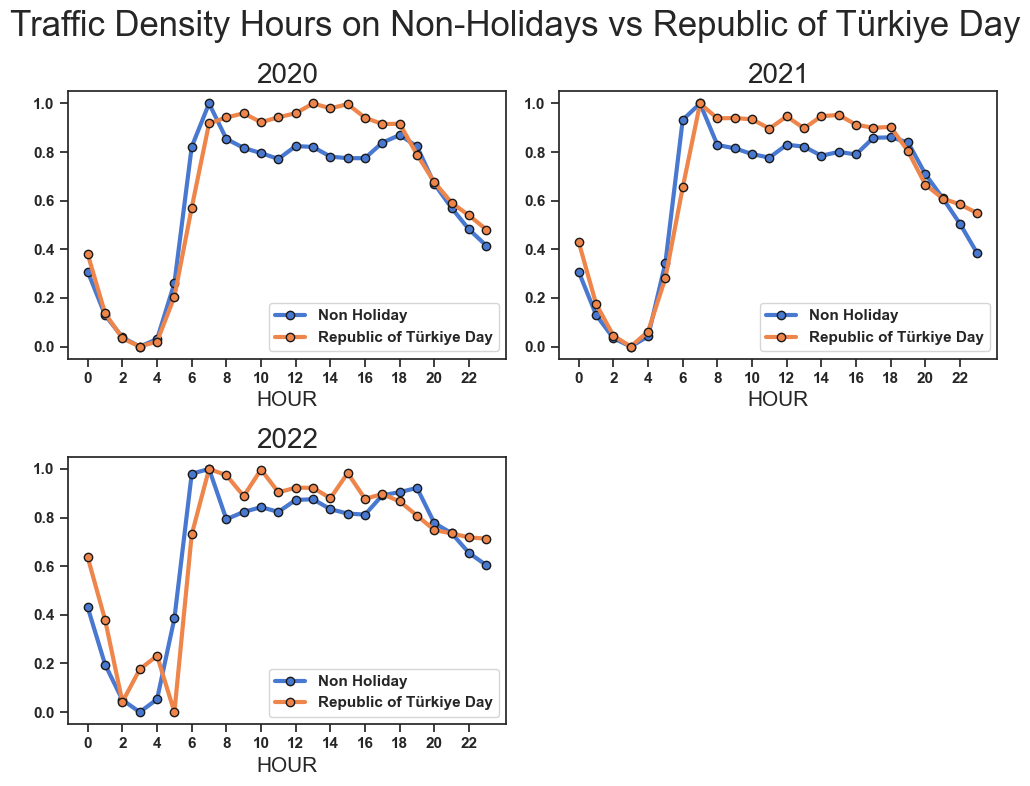

In [17]:
plot_hrly_td(hol_col_type='SCHOOL_HOLIDAY_TYPE', col='Republic of Türkiye Day')

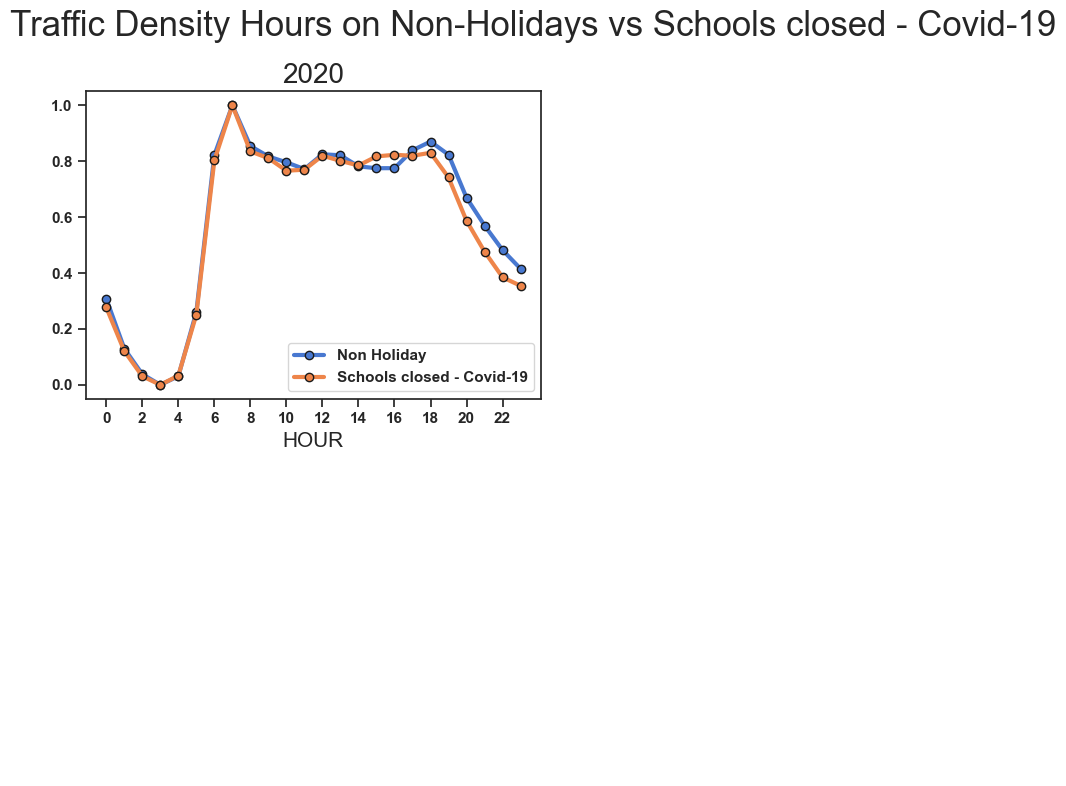

In [18]:
plot_hrly_td(hol_col_type='SCHOOL_HOLIDAY_TYPE', col='Schools closed - Covid-19')

### Checking traffic density distribution by year for Summer holidays (School holidays)

In [19]:
def school_hol_boxplot(col):

    temp_df = (
        pl_df.lazy()
        .filter(pl.col('SCHOOL_HOLIDAY_TYPE').is_in(['Non Holiday', col]))
        .filter(pl.col('YEAR').ne(2023))
        .groupby('DATE_TIME', 'YEAR', 'SCHOOL_HOLIDAY_TYPE')
        .agg(pl.col('NUMBER_OF_VEHICLES').mean())
        .sort('SCHOOL_HOLIDAY_TYPE')
        .collect(streaming=True)
        .to_pandas()
        .assign(SCHOOL_HOLIDAY_TYPE=lambda x: x['SCHOOL_HOLIDAY_TYPE'].astype('string'))
    )

    plt.figure(figsize=(8, 5))

    ax = sns.boxplot(
        x='NUMBER_OF_VEHICLES',
        y='YEAR',
        hue='SCHOOL_HOLIDAY_TYPE',
        data=temp_df,
        orient='h',
        showmeans=True, #To display mean
        notch=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "yellow",
            "markeredgecolor": "black",
            "markersize": "5"
        },
        medianprops={"color": "red"}
    )

    ax.set_title(f'Non Holiday vs {col} TD distribution')
    ax.legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.3))
    
    plt.show();

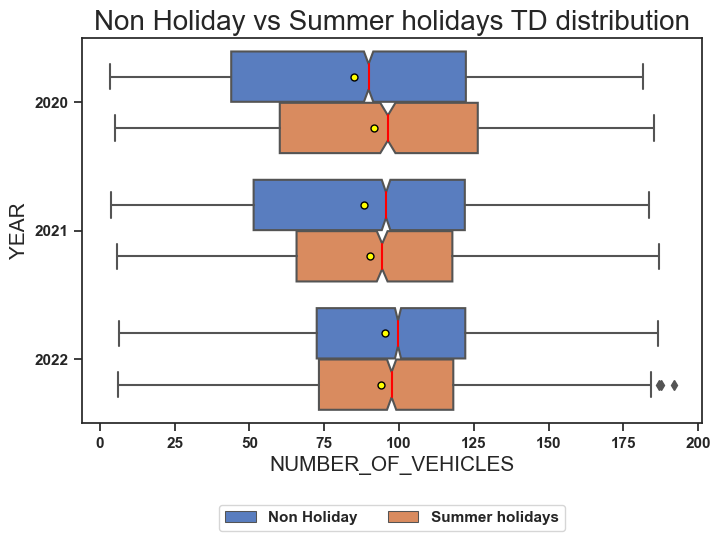

In [20]:
school_hol_boxplot('Summer holidays')

    When analyzing the distributions by year, the result are a lot more sensible. Although the traffic density during summer holidays are higher during 2020, since 2021, the median traffic density during summer holidays are lower than the non holidays. 

**Note**: If you observe 2021 closely, although the **median traffic density duing summer holidays is lower**, the **mean traffic density during summer holidays is still higher** than non holiday.

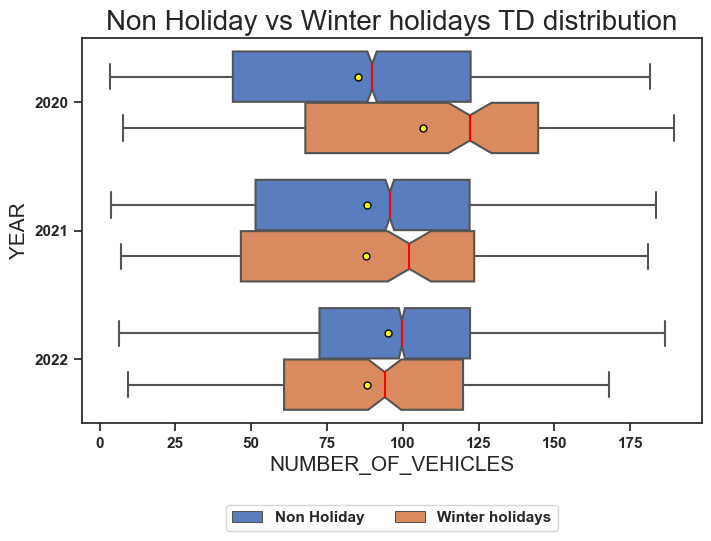

In [21]:
school_hol_boxplot('Winter holidays')

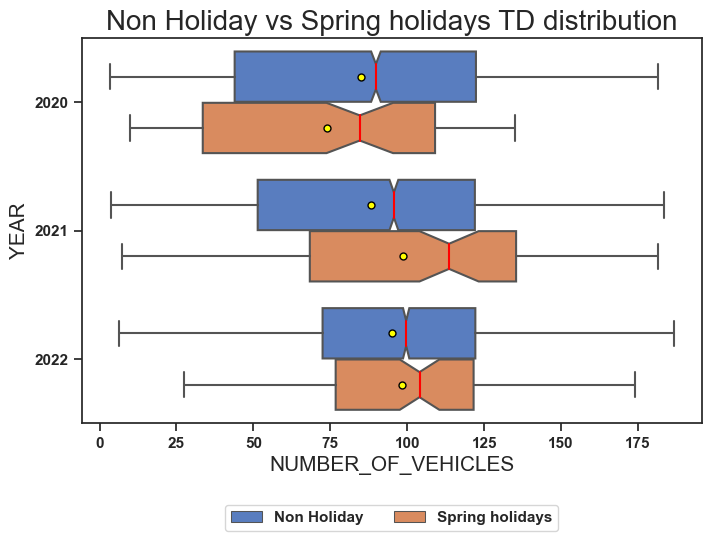

In [22]:
school_hol_boxplot('Spring holidays')

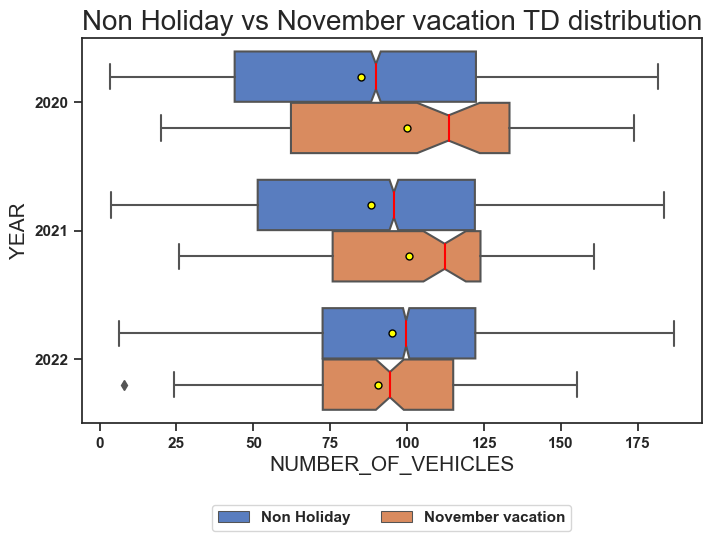

In [23]:
school_hol_boxplot('November vacation')